In [1]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
setwd('/import/10x.v3/con2/')

In [4]:
spot_meta = read.csv("./tissue_positions_list.csv",
                     header = FALSE)
head(spot_meta)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<int>,<int>,<int>,<int>
1,ACGCCTGACACGCGCT-1,0,0,0,508,646
2,TACCGATCCAACACTT-1,0,1,1,580,689
3,ATTAAAGCGGACGAGC-1,0,0,2,507,729
4,GATAAGGGACGATTAG-1,0,1,3,578,772
5,GTGCAAATCACCAATA-1,0,0,4,505,812
6,TGTTGGCTGGCGGAAG-1,0,1,5,577,855


In [6]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
sce = Read10X("./") %>% 
  CreateSeuratObject(assay = "Spot")

In [8]:
image <- Read10X_Image(image.dir = "./")
image@image %>% dim()

[1] 599 600   3

In [9]:
image@scale.factors  #储存json信息
DefaultAssay(image) <- "Spot"  
DefaultAssay(image)
sce[["posterior"]] <- image
sce

$spot
[1] 0.3051571

$fiducial
[1] 87.19801

$hires
[1] 0.3051571

$lowres
[1] 0.09154715

attr(,"class")
[1] "scalefactors"

[1] "Spot"

An object of class Seurat 
32285 features across 2682 samples within 1 assay 
Active assay: Spot (32285 features, 0 variable features)
 1 image present: posterior

In [21]:
sce@images$posterior@scale.factors



$spot
[1] 0.3051571

$fiducial
[1] 87.19801

$hires
[1] 0.3051571

$lowres
[1] 0.09154715

attr(,"class")
[1] "scalefactors"

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


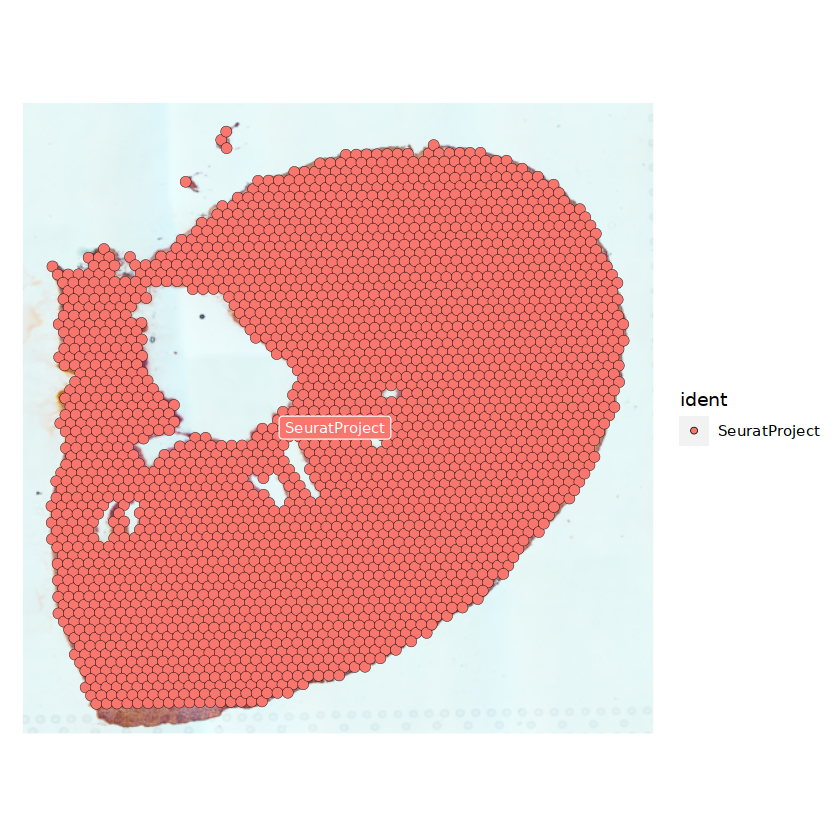

In [12]:
SpatialDimPlot(sce,label = T,label.size = 3, images = "posterior")

In [16]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


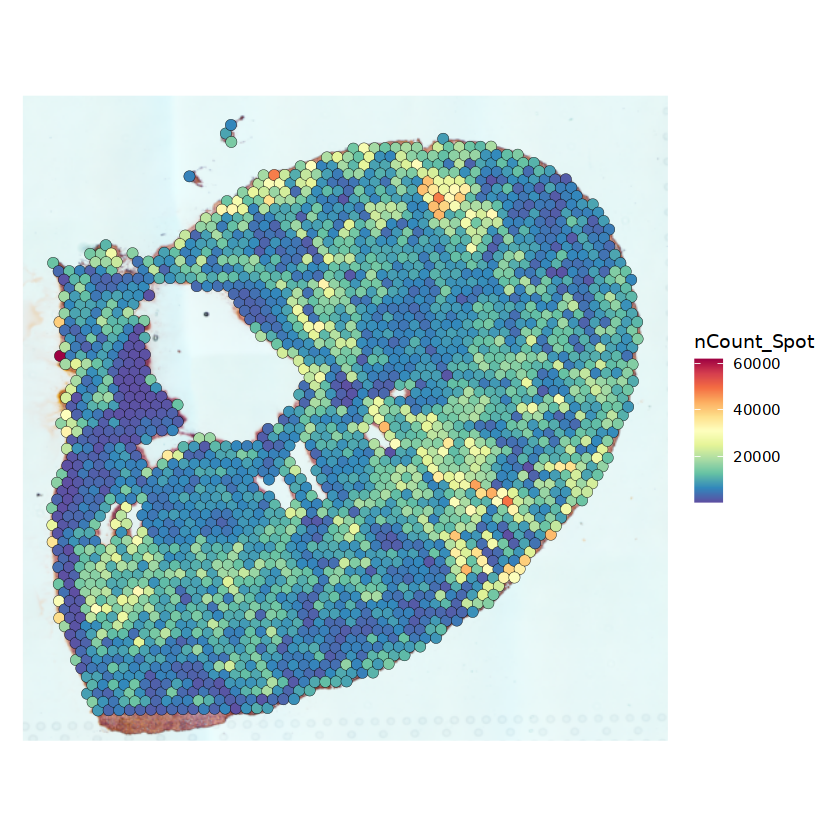

In [17]:
SpatialFeaturePlot(sce, features = "nCount_Spot") + theme(legend.position = "right")

In [22]:
library(SeuratDisk)
library(Seurat)      
SaveH5Seurat(sce,filename="female.2.h5seurat", overwrite = TRUE)
Convert("female.2.h5seurat", dest = "h5ad", overwrite = TRUE)	

Warning message:
"package 'SeuratDisk' was built under R version 4.2.3"
Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Creating h5Seurat file for version 3.1.5.9900

Adding counts for Spot

Adding data for Spot

No variable features found for Spot

No feature-level metadata found for Spot

Adding image posterior

Validating h5Seurat file

Adding data from Spot as X

Adding counts from Spot as raw

Transfering meta.data to obs

